<h1>Diabetes Prediction</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve, classification_report, accuracy_score,log_loss, confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.shape

(768, 9)

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.duplicated().any()

False

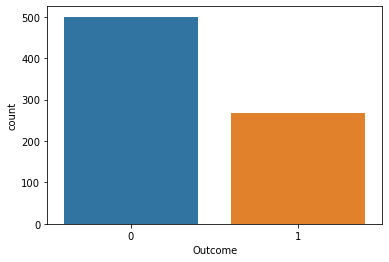

In [9]:
sns.countplot(x="Outcome", data=data)
plt.show()

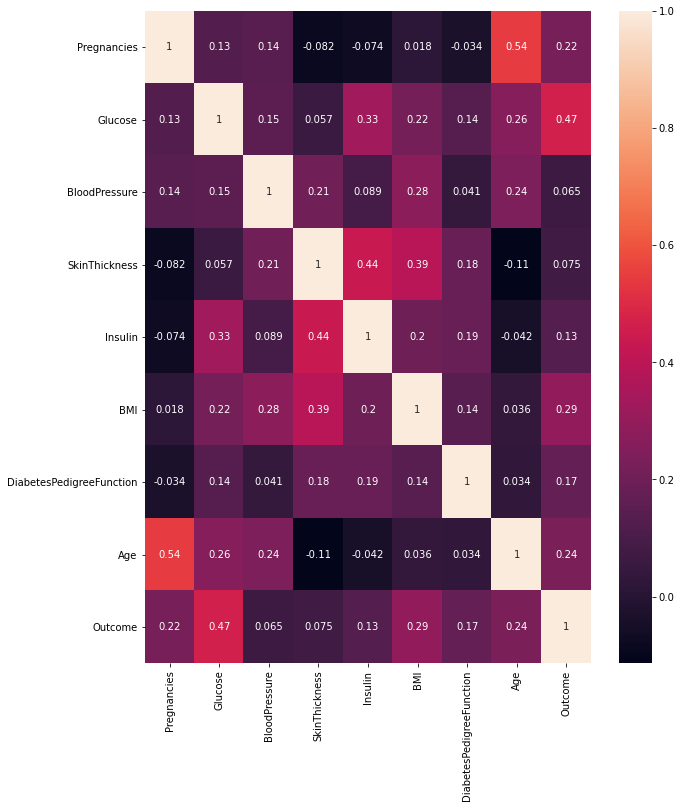

In [10]:
plt.figure(figsize=(10,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [11]:
x=data.drop(columns='Outcome')
y=data['Outcome']

In [12]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

<h2>1.Logistic Regression </h2>

In [14]:
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
y_pr=logreg.predict_proba(x_test)[:,1]

In [15]:
roc_auc_score(y_train, logreg.predict_proba(x_train)[:,1])


0.8308751568742587

In [16]:
roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])

0.8665738715450388

In [17]:
print(f'accuracy of model is:{accuracy_score(y_test, logreg.predict(x_test))}')
print(f"classification report is:{classification_report(y_test, logreg.predict(x_test))}")

accuracy of model is:0.8246753246753247
classification report is:              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [18]:
print(f"confusion matrix is :{confusion_matrix(y_test, logreg.predict(x_test))}")

confusion matrix is :[[98  9]
 [18 29]]


<h2> 2. Random Forest </h2>

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
 y_pred=rf.predict(x_test)

In [21]:
print(f'accuracy of model is:{accuracy_score(y_test,rf.predict(x_test))}')
print(f'classification report is:{classification_report(y_test, rf.predict(x_test))}')

accuracy of model is:0.8116883116883117
classification report is:              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [22]:
print(f'Confusion matrix is:{confusion_matrix(y_test, rf.predict(x_test))}')

Confusion matrix is:[[93 14]
 [15 32]]


<h2>3.XGBoost</h2>

In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
from xgboost import XGBClassifier

In [25]:
xgb= XGBClassifier()
xgb.fit(x_train, y_train)

[09:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
y_pred1=xgb.predict(x_test)

In [27]:
print(f'accuracy of model is:{accuracy_score(y_test,y_pred1)}')
print(f'Classification report is:{classification_report(y_test,y_pred1)}')

accuracy of model is:0.7597402597402597
Classification report is:              precision    recall  f1-score   support

           0       0.84      0.80      0.82       107
           1       0.60      0.66      0.63        47

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154



In [28]:
print(f'Confusion matrix is:{confusion_matrix(y_test, y_pred1)}')

Confusion matrix is:[[86 21]
 [16 31]]


<h2>4.Decision Tree</h2>

In [29]:
from sklearn.tree import DecisionTreeClassifier


In [30]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred2=dtree.predict(x_test)

In [32]:
print(f'accuracy of model is:{accuracy_score(y_test, y_pred2)}')
print(f'classification report is:{classification_report(y_test, y_pred2)}')

accuracy of model is:0.7922077922077922
classification report is:              precision    recall  f1-score   support

           0       0.87      0.82      0.85       107
           1       0.64      0.72      0.68        47

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.80       154



In [33]:
print(f'confusion matrix is:{confusion_matrix(y_test, y_pred2)}')

confusion matrix is:[[88 19]
 [13 34]]


<h2>5.K-Nearest Neighbour </h2>

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

#print("Train Set Accuracy:"+str(accuracy_score(y_train,knn.predict(x_train))*100))
#print("Test Set Accuracy:"+str(accuracy_score(y_test,knn.predict(x_test))*100))

KNeighborsClassifier(n_neighbors=9)

In [36]:
y_pred3=knn.predict(x_test)

In [37]:
print(f'accuracy of model is:{accuracy_score(y_test, y_pred3)}')
print(f'classification report is:{classification_report(y_test, y_pred3)}')

accuracy of model is:0.7727272727272727
classification report is:              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.63      0.62      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



In [38]:
print(f'confusion matrix is:{confusion_matrix(y_test, y_pred3)}')

confusion matrix is:[[90 17]
 [18 29]]


<h2>6. Support Vector Machine </h2>

In [39]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

#print("Train Set Accuracy:"+str(accuracy_score(y_train,svm.predict(x_train))*100))
#print("Test Set Accuracy:"+str(accuracy_score(y_test,svm.predict(x_test))*100))

SVC()

In [40]:
y_pred4=svm.predict(x_test)

In [41]:
print(f'accuracy of model is:{accuracy_score(y_test, y_pred4)}')
print(f'classification report is:{classification_report(y_test, y_pred4)}')

accuracy of model is:0.7922077922077922
classification report is:              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



In [42]:
print(f'confusion matrix is:{confusion_matrix(y_test, y_pred4)}')

confusion matrix is:[[98  9]
 [23 24]]


<h2>7.Naive Bayes</h2>

In [138]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)


GaussianNB()

In [139]:
y_pred5=nb.predict(x_test)

In [140]:
print(f'accuracy of model is:{accuracy_score(y_test, y_pred5)}')
print(f'classification report is:{classification_report(y_test, y_pred5)}')

accuracy of model is:0.7922077922077922
classification report is:              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [141]:
print(f'confusion matrix is:{confusion_matrix(y_test, y_pred5)}')

confusion matrix is:[[93 14]
 [18 29]]


<h2>8. Voting classifier </h2>

In [142]:
from sklearn.ensemble import VotingClassifier

classifiers = [('XGboost', xgb), ('Random Forest', rf), 
               ('Logistic', logreg), ('KNN', knn), ('SVM', svm)]
vc = VotingClassifier(estimators = classifiers)

In [143]:
vc.fit(x_train, y_train)


[00:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('XGboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=4,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
          

In [144]:
vc_preds = vc.predict(x_test)

In [145]:
print(f'accuracy of model is:{accuracy_score(y_test, vc_preds)}')
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, vc_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, vc_preds)}")

accuracy of model is:0.8246753246753247
Confusion Matrix :- 
[[97 10]
 [17 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       107
           1       0.75      0.64      0.69        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [146]:
print('accuracy of Logistic regression model is:', accuracy_score(y_test, logreg.predict(x_test))*100,'%')
print('The accuracy score of Random Forest  is: ', accuracy_score(y_test, y_pred0)*100,'%')
print('The accuracy score of XGBoost  is: ', accuracy_score(y_test, y_pred1)*100,'%')
print('The accuracy score of Decision tree  is: ', accuracy_score(y_test, y_pred2)*100,'%')
print('The accuracy score of KNN  is: ', accuracy_score(y_test, y_pred3)*100,'%')
print('The accuracy score of SVM  is: ', accuracy_score(y_test, y_pred4)*100,'%')
print('The accuracy score of Naive Bayes  is: ', accuracy_score(y_test, y_pred5)*100,'%')
print('The accuracy score of Voting Classifer  is: ', accuracy_score(y_test, vc_preds)*100,'%')

accuracy of Logistic regression model is: 82.46753246753246 %
The accuracy score of Random Forest  is:  80.51948051948052 %
The accuracy score of XGBoost  is:  75.97402597402598 %
The accuracy score of Decision tree  is:  77.27272727272727 %
The accuracy score of KNN  is:  77.27272727272727 %
The accuracy score of SVM  is:  79.22077922077922 %
The accuracy score of Naive Bayes  is:  79.22077922077922 %
The accuracy score of Voting Classifer  is:  82.46753246753246 %


In [148]:
lr=accuracy_score(y_test, logreg.predict(x_test))
rf=accuracy_score(y_test, y_pred0)
xgb=accuracy_score(y_test, y_pred1)
dt=accuracy_score(y_test, y_pred2)
knn=accuracy_score(y_test, y_pred3)
svm=accuracy_score(y_test, y_pred4)
nb=accuracy_score(y_test, y_pred5)
vc=accuracy_score(y_test, vc_preds)

In [149]:
model = ['Logistic Regression', 'Random Forests','XGBoost','Decision Tree','K Nearest Neighbors', 'Support Vector Machines',
         'Naive bayes', 'Voting Classifier']
score = [lr, rf, xgb, dt, knn, svm, nb, vc]

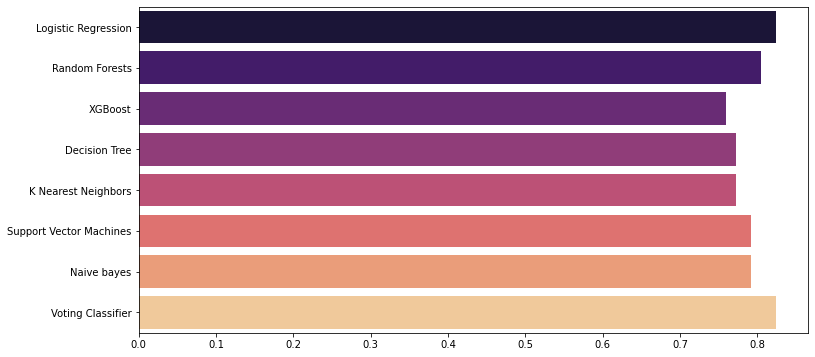

In [150]:
plt.figure(figsize = (12, 6))
sns.barplot(x = score, y = model, palette = 'magma')
plt.show()

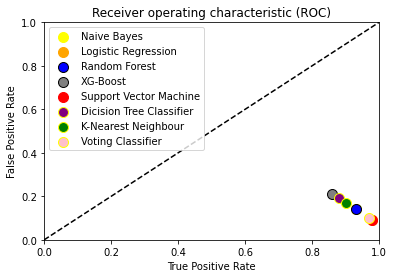

In [44]:
import numpy as np
import matplotlib.pyplot as plt

logistic = np.array([0.98, 0.09])
naive_bayes = np.array([0.93, 0.14])
random_forest = np.array([0.93, 0.14])
xgb = np.array([0.86, 0.21])
dt = np.array([0.88, 0.19])
knn = np.array([0.90, 0.17])
svm = np.array([0.98, 0.09])
vc = np.array([0.97, 0.10])


#plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='yellow', edgecolors='yellow', s=100)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=100)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=100)
plt.scatter(xgb[0], xgb[1], label = 'XG-Boost', facecolors='gray', edgecolors='black', s=100)
plt.scatter(svm[0], svm[1], label = 'Support Vector Machine', facecolors='red', edgecolors='red', s=100)
plt.scatter(dt[0], dt[1], label = 'Dicision Tree Classifier', facecolors='purple', edgecolors='yellow', s=100)
plt.scatter(knn[0], knn[1], label = 'K-Nearest Neighbour', facecolors='green', edgecolors='yellow', s=100)
plt.scatter(vc[0], vc[1], label = 'Voting Classifier', facecolors='pink', edgecolors='yellow', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='upper left')

plt.show()